# EN-2550 Assignment 2 
## Name : Ekanayaka S.D.
## Index No : 190162F                                                                           

### GitHub Repository: https://github.com/sasdil/EN-2550-Computer-Vision


# Question 1

In below code, I implementing the RANSAC algorithm for Circle fitting. So for randomly choosed sample which consist with 3 point coordinates, we estimate the circle which go through those points. Then set a threshold value for check which circle is consist with most inliers.That belongs to best sample and then we put those inliers and best sample coordinates to get the RANSAC circle, So it is little bit deviate from best sample circle.

In [2]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
x_=[]
y_=[]
for i in X:
    x_.append(i[0])
    y_.append(i[1])
    

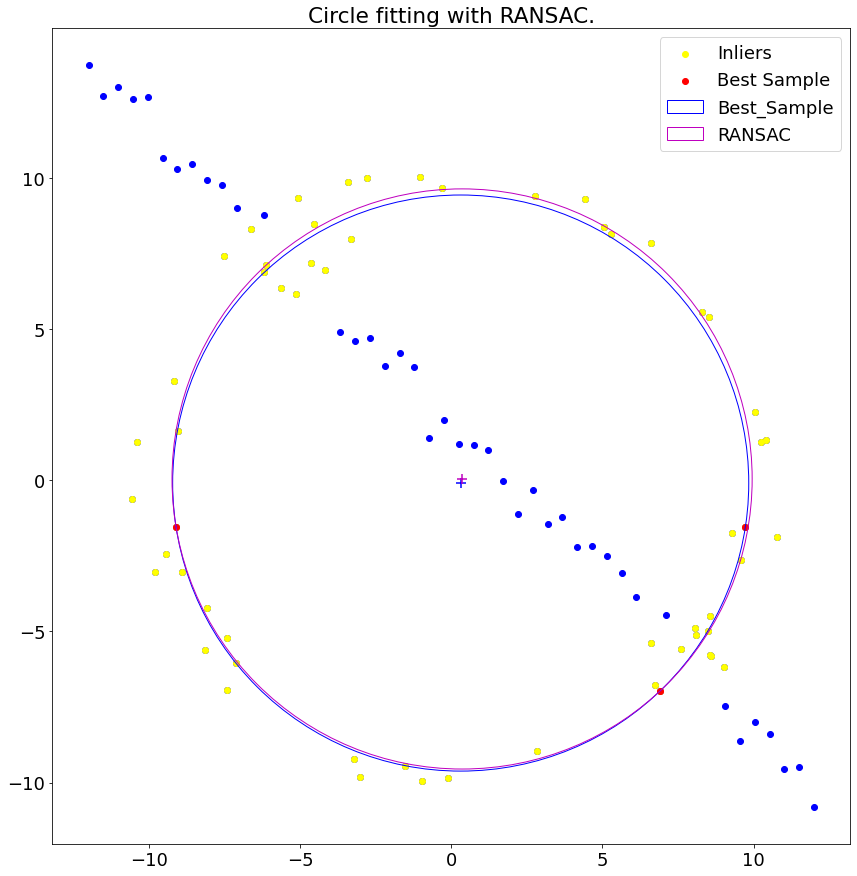

59


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#Class Object for Generating All required functions for RANSAC 
class RANSAC_gen:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_max=15
        self.best_model = None
        self.point= None
        self.mod = None
        self.inliers = None
    #Function for Randomly take 3 points sample    
    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

        # get three points from data
        while True:
            ran = np.random.randint(len(self.x_data))
            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample
    #Function for genarate respective model
    def make_model(self, sample):

        pt1 = sample[0]
        pt2 = sample[1]
        pt3 = sample[2]
       
        A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
        B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
        inv_A = inv(A)

        c_x, c_y = np.dot(inv_A, B) / 2
       
        c_x, c_y = c_x[0], c_y[0]
        r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)
        return c_x, c_y, r
    #Function for filter out inliers
    def get_inliers(self,cx,cy,r):
        P=[]
        t=1.4
        xd=self.x_data
        yd=self.y_data
        for i in range(len(xd)):
            dis = np.sqrt((xd[i]-cx)**2 + (yd[i]-cy)**2)
            if (r-t<=abs(dis)<=r+t):
                P.append([xd[i],yd[i]])
                
        
        return (P)    
    def eval_model(self, model):
        c_x, c_y, r = model
        P = self.get_inliers(c_x,c_y,r)
        return P
    #Find the best model by excuting functions
    def execute_ransac(self):
        # find best model
        
        for i in range(self.n):
            mod=self.random_sampling()
            model = self.make_model(mod)
            c_x, c_y, r = model
            d_temp = self.eval_model(model)
                
            if self.d_max < len(d_temp):
                self.best_model = model
                self.d_max = len(d_temp)
                self.mode = mod
                self.inliers = d_temp
if __name__ == '__main__':
    # make data
    x_data, y_data = x_,y_
    plt.scatter(x_data, y_data, c='blue')
    ransac = RANSAC_gen(x_data, y_data, 100)
    ransac.execute_ransac()
    # get best model sample from ransac
    a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    Point = ransac.inliers
    x_1=[]
    y_1=[]
    for i in Point:
        x_1.append(i[0])
        y_1.append(i[1])
    
    x_2=[]
    y_2=[]
    for i in ransac.mode:
        x_2.append(i[0])
        y_2.append(i[1])
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.rcParams.update({'font.size': 18})
    plt.scatter(x_1,y_1,color = 'yellow',label='Inliers')
    plt.scatter(x_2,y_2,color = 'red',label='Best Sample')
    plt.scatter(a,b,s = 100,c = 'b',marker = '+')
    circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False,label = 'Best_Sample')
    plt.gca().add_patch(circle) 
    # get best model from ransac for best sample
    ransac = RANSAC_gen(x_1, y_1, 100)
    ransac.execute_ransac()
    a2, b2, r2 = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    circle = plt.Circle((a2, b2), radius=r2, color='m', fc='y', fill=False,label = 'RANSAC')
    plt.scatter(a2,b2,s = 100,c = 'm',marker = '+')
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,3,0,1]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.title('Circle fitting with RANSAC.')
    plt.show()
    print(len(Point))
    

# Question 2

In here first we take 4 point coordinates given by user.(In class object 'Click' function is belongs to that task). These points refer to destination points which use to compute homography later. Afterwards we take vertices of source image as source points and then calculate the homography using 'cv.findHomography()' inbuilt function. Resulting images are shown in the below.

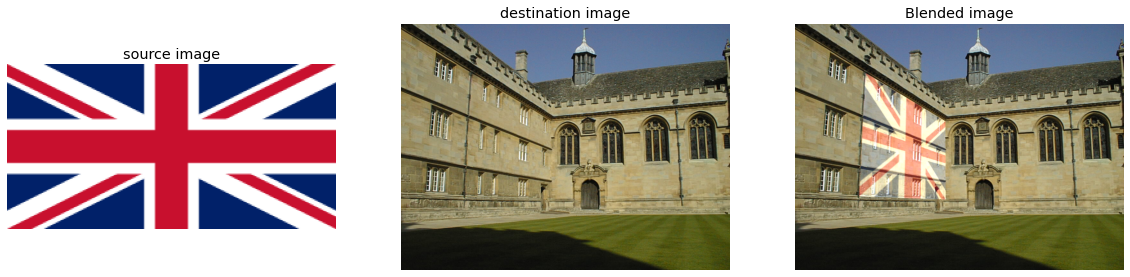

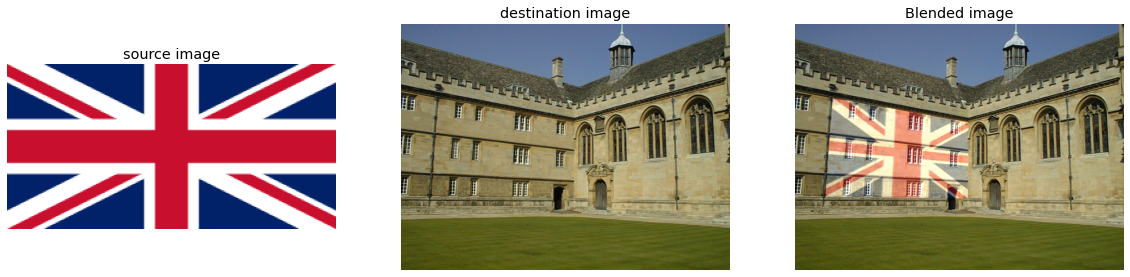

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
img2 = cv2.imread('002.jpg')
img1 = cv2.imread('Flag_of_the_United_Kingdom.svg.png')
img3 = cv2.imread('005.jpg')

#Class object for genarate warpped image
class warp_gen:
    def __init__(self,im1,im2,count,Points):
        self.im1 = im1
        self.im2 = im2
        self.count = count
        self.Points = Points
    #function for get coordinates according to mouse clicks
    def Click(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.Points.append([x,y])
            self.count+=1
    #Function for homography calcultions and warpping/ Blending of the image
    def process(self):
        wname = "Image"
        cv2.namedWindow(winname=wname)
        cv2.setMouseCallback(wname, self.Click)
        while self.count<4 :
            cv2.imshow(wname,self.im2)
            cv2.waitKey(1)
        cv2.destroyAllWindows()
        if (len(self.Points)==4):
            im_src = self.im1
            h, w, c = im_src.shape
            pts_src = np.array([[0,0],[w-1, 0],[w-1, h-1],[0,h-1]])
            im_dst =self.im2
            pts_dst = np.array(self.Points)
            h, status = cv2.findHomography(pts_src, pts_dst)
            im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
        
            #Blend the image to get finale proper image
            result = cv2.addWeighted(im_dst,1,im_out ,0.4, 0);
            fig,ax = plt.subplots(1,3,figsize=(20,20))
            plt.rcParams.update({'font.size': 12})
            ax[0].set_title("source image")
            ax[0].imshow(cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB))
            ax[1].set_title("destination image")
            ax[1].imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
            ax[2].set_title("Blended image")
            ax[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            for i in range(3):
                ax[i].axis('off')
if __name__ == '__main__':
    #apply for two separate images to observe the changes
    warp=warp_gen(img1,img3,0,[])
    warp.process()
    warp=warp_gen(img1,img2,0,[])
    warp.process()




# Question 3

## Part (A)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img1 = cv.imread('./img1.ppm')
img2 = cv.imread('./img2.ppm')
img3 = cv.imread('./img3.ppm')
img4 = cv.imread('./img4.ppm')
img5 = cv.imread('./img5.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

def siftmatch(img1,img2):
    sift = cv.SIFT_create()

    kp1, descriptors_1 = sift.detectAndCompute(img1, None) 
    kp2, descriptors_2 = sift.detectAndCompute(img2, None)


    bf1 = cv.BFMatcher(cv.NORM_L1, crossCheck = True)


    matches1 = bf1.match(descriptors_1, descriptors_2)
    
    sortmatches1 = sorted(matches1, key = lambda x:x.distance)

    return matches1,[kp1,kp2]

## Part (B) & Part (C) 

[[ 6.67019653e-01  1.13478155e-01  2.08497159e+02]
 [ 2.34571856e-01  1.23419146e+00 -3.30722246e+01]
 [ 5.45740936e-04  8.73272729e-06  1.01153819e+00]]


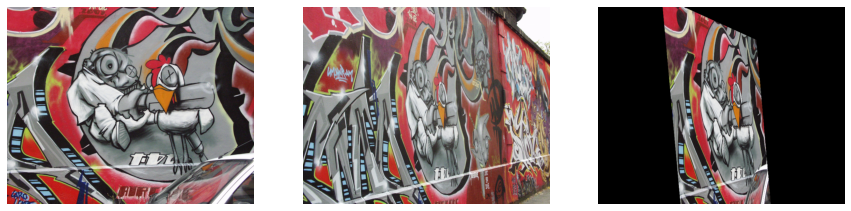

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random


def SSD(corres, h):

    pts1 = np.transpose(np.matrix([corres[0].item(0), corres[0].item(1), 1]))
    estimatep1 = np.dot(h, pts1)
    estimatep2 = (1/estimatep1.item(2))*estimatep1
    

    pts2 = np.transpose(np.matrix([corres[0].item(2), corres[0].item(3), 1]))
    error = pts2 - estimatep2
    return np.linalg.norm(error)

def Homography(correspondences):
    #loop through correspondences and create assemble matrix
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h


def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))

        #call the homography function on those points
        h = calculateHomography(randomFour)
        inliers = []

        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        
        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers
def corr_list(matches1,key):
    correspondenceList1 = []
    keypoints1 = [key[0],key[1]]
    for match in matches1:
        (x1, y1) = keypoints1[0][match.queryIdx].pt
        (x2, y2) = keypoints1[1][match.trainIdx].pt
        correspondenceList1.append([x1, y1, x2, y2])
    return correspondenceList1

match1,ky1=siftmatch(img1,img2)
correspondenceList1=corr_list(match1,ky1)
corrs1 = np.matrix(correspondenceList1)
finalH1, inliers1 = ransac(corrs1, 0.6)
match2,ky2=siftmatch(img2,img3)
correspondenceList2=corr_list(match2,ky2)
corrs2 = np.matrix(correspondenceList2)
finalH2, inliers2 = ransac(corrs2, 0.6)
match3,ky3=siftmatch(img3,img4)
correspondenceList3=corr_list(match3,ky3)
corrs3 = np.matrix(correspondenceList3)
finalH3, inliers3 = ransac(corrs3, 0.6)
match4,ky4=siftmatch(img4,img5)
correspondenceList4=corr_list(match4,ky4)
corrs4 = np.matrix(correspondenceList4)
finalH4, inliers4 = ransac(corrs4, 0.6)
H = finalH4 @ finalH3 @ finalH2 @ finalH1
print(H)

dst1 = cv.warpPerspective(img1, H, ((img5.shape[1]), img5.shape[0]))
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(img1)
ax[1].imshow(img5)
ax[2].imshow(dst1)
for i in range(3):
    ax[i].axis('off')
plt.show()